# Diamond Price Prediction
                    
                    To explore the relationship between features and price of diamonds. The goal is to predict the price of diamonds using variables that describe the quality of diamonds such as carat, cut and clarity.

#### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## 1. Load the dataset

In [2]:
diamond_df = pd.read_csv("diamonds.csv",index_col=0)

## 2. Preprocessing
a) Print the first 5 rows of the dataset

In [3]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Check the last five records of the dataset
diamond_df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


* It shows that there are 9 independent variables <br>
    'carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z' and one dependent variable 'price'.<br><br>

* Features of the Dataset<br>
    * carat: weight of the diamond.<br>
    * cut:   describe the cut quality of the diamond (Fair, Good, Very Good, Premium, Ideal).<br>
    * color: color of the diamond, from J (worst) to D (best).<br>
    * clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).<br>
    * depth: the height of a diamond.<br>
    * table: the width of the diamond.<br>
    * x: length in mm<br>
    * y: width in mm<br>
    * z: depth in mm<br>
    * price: the price of the diamond in USD







In [5]:
# To get the shape of the dataset
diamond_df.shape

(53940, 10)

* There are 53940 rows and 10 columns.

#### b) Check the features in the dataset 

In [6]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


* The detailed information about the dataset number of rows (53940), number of columns (10), data types information price is in integer type, cut, color, clarity are object type and remaining  other columns are float type. 

#### c) Check the missing values

In [7]:
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

* There are no null values present in the dataset

#### d) Check the numerical features in the dataset

In [8]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* We can observe that carat,table,price are right skewed distribution.

#### e) Check the distribution of categorical columns

In [9]:
diamond_df.select_dtypes("object").columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [10]:
diamond_df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

* We can observe that the quality of the diamond(Ideal) is more compared to others.

In [11]:
diamond_df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

* We can observe that the color of the diamond (G) is more compared to others.

In [12]:
diamond_df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

* We can observe that the clarity of the diamond(SI1) is more compared to others.

In [13]:
# converting the dtype of Price
diamond_df['price'] = diamond_df['price'].astype(float)

In [14]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


### Visualization

#### Plotting a histplot for all the features

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

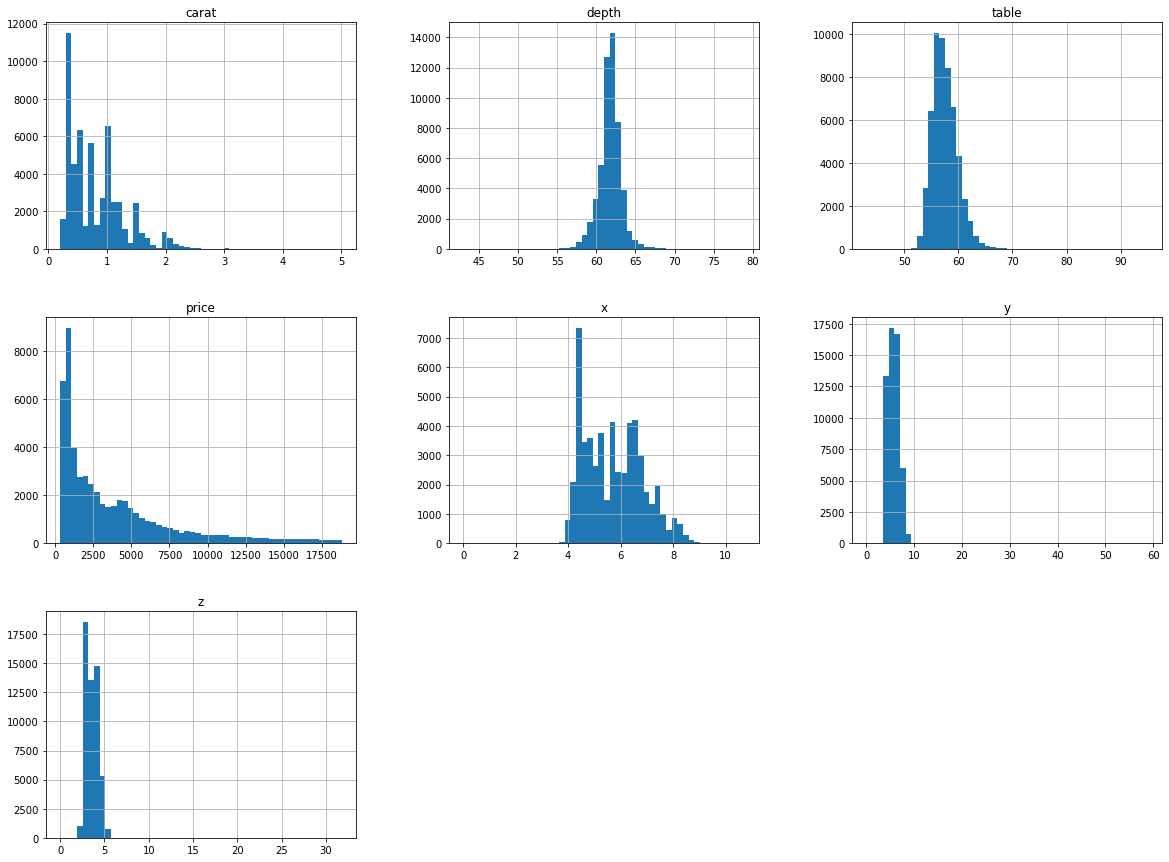

In [15]:
diamond_df.hist(bins = 50, figsize=(20,15))

* Observations:
    * Carat: It is a right skewed distribution and few outliers are present.
    * Depth, Table, X, Y and Z : It looks like unifrom distribution and has few outliers are present.
    * Price: It is a right skewed distribution and few outliers are present.  

#### Plotting a countplot for the feature cut

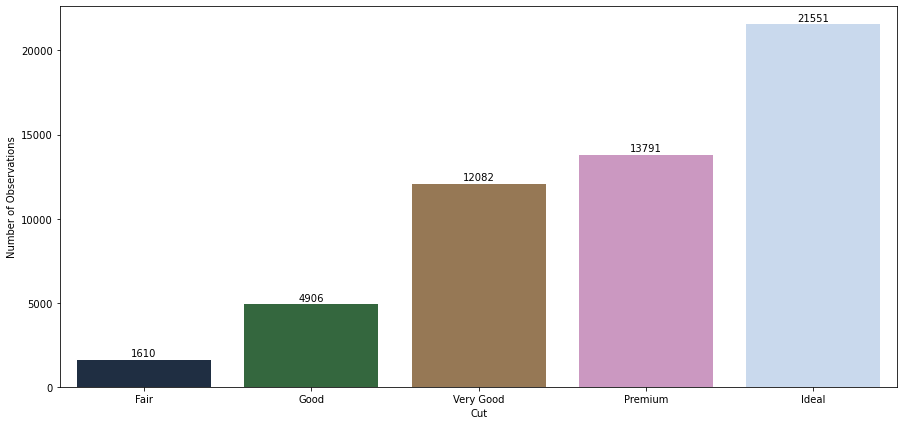

In [16]:
# From Worst to Best (Fair= Worst) ,(Ideal= Best)
plt.figure(figsize= (15, 7))
cut = sns.countplot(x= "cut", data= diamond_df, palette= sns.color_palette("cubehelix", 5),
              order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Number of Observations")
for p in cut.patches:
    height = p.get_height().round(2)
    text = str(height)
    cut.text(p.get_x()+p.get_width()/2,height + 200,text, ha="center")
plt.show()

* We can observe that the quality of the diamond 
            * Ideal is highest 21551.
            * Fair is least 1610.

#### Plotting a countplot for the feature clarity

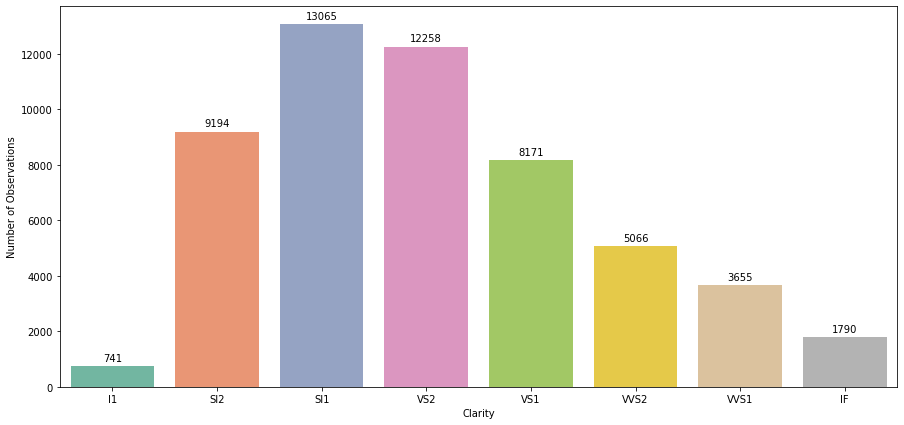

In [17]:
# From Worst to Best (I1= Worst) (IF= Best)
plt.figure(figsize= (15, 7))
clarity = sns.countplot(x= "clarity", data= diamond_df, order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], palette= "Set2")
plt.xlabel("Clarity")
plt.ylabel("Number of Observations")
for p in clarity.patches:
    height = p.get_height().round(2)
    text = str(height)
    clarity.text(p.get_x()+p.get_width()/2,height + 200,text, ha="center")

plt.show()

* We can observe that the clarity of the diamond
        * SI1 is highest 13065
        * I1 is least 741

#### Plotting a countplot for the feature color

In [18]:
color_dict = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#5E3434"]

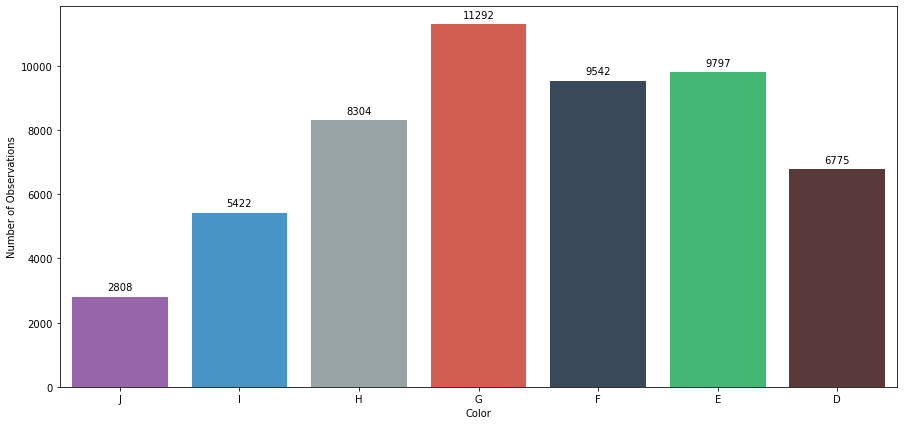

In [19]:
# From Worst to Best (J= Worst) (D= Best)
plt.figure(figsize= (15, 7))
color = sns.countplot(x= "color", data= diamond_df, palette= color_dict, order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Number of Observations")
for p in color.patches:
    height = p.get_height().round(2)
    text = str(height)
    color.text(p.get_x()+p.get_width()/2,height + 200,text, ha="center")
plt.show()

* We can observe that that the color of the diamond 
            * G is highest 11292
            * J is least 2808

#### Comparison of carat with price based on diamond cut

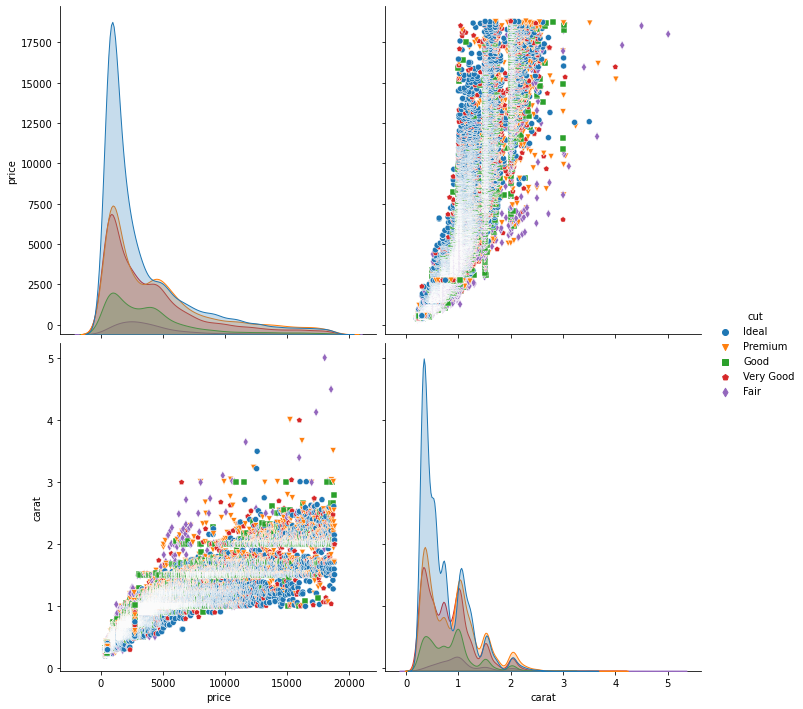

In [20]:
sns.pairplot(diamond_df[['price','carat','cut']],markers = ["o","v","s","p","d"],hue="cut", height=5)

#### Plotting a bar plot for the feature cut vs price of the diamond

Text(0.5, 1.0, 'Cut Vs Price')

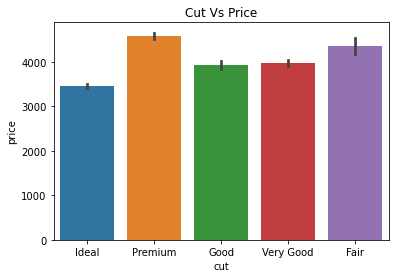

In [21]:
sns.barplot(x='cut',y='price',data=diamond_df)
plt.title("Cut Vs Price")

#### Plotting a bar plot for the feature cut vs carat of the diamond

Text(0.5, 1.0, 'Cut vs Carat')

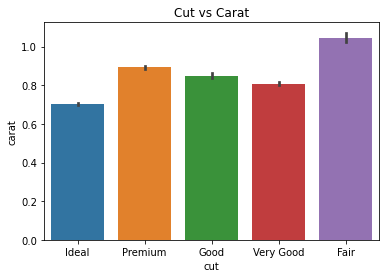

In [22]:
sns.barplot(x='cut',y='carat',data=diamond_df)
plt.title("Cut vs Carat")

* Premium cut diamonds are the most expensive diamonds.
* Fair cut diamonds weigh the most but are not the most expensive diamonds.
* Ideal cut diamonds weigh less and are less expensive diamonds.
* We can see that price of diamond is dependent on the cut.

#### Comparison of carat with price based on diamond color

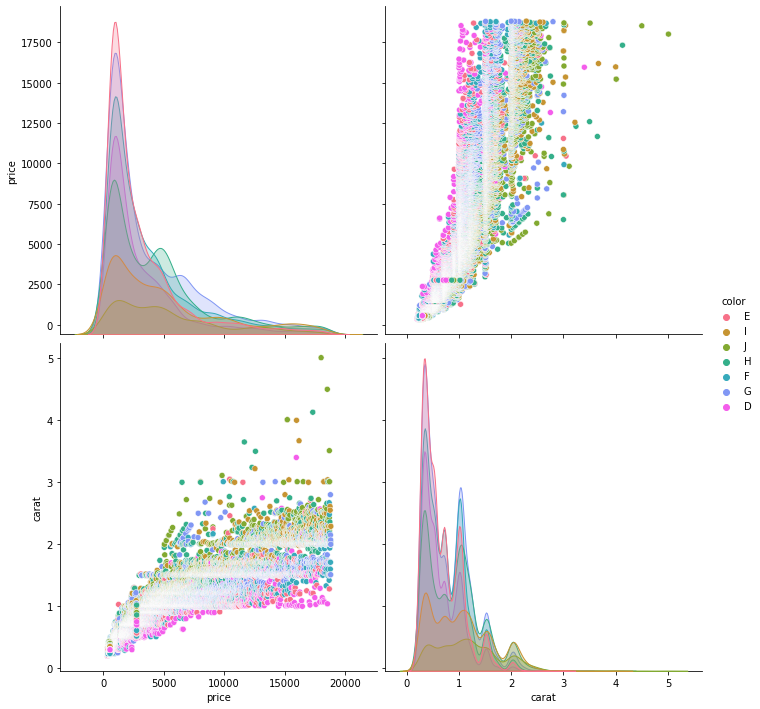

In [23]:
sns.pairplot(diamond_df[['price','carat','color']],hue='color',height=5,palette="husl")

#### Plotting a bar plot for the feature color vs price of the diamond

Text(0.5, 1.0, 'Color vs Price')

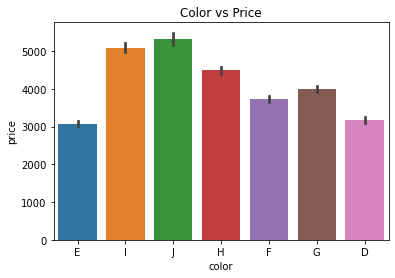

In [24]:
sns.barplot(x="color",y="price",data = diamond_df)
plt.title("Color vs Price")

#### Plotting a bar plot for the feature color vs carat of the diamond

Text(0.5, 1.0, 'Color vs Carat')

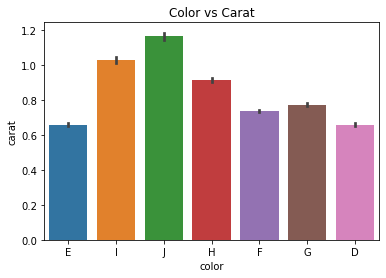

In [25]:
sns.barplot(x="color",y="carat",data = diamond_df)
plt.title("Color vs Carat")

* J color diamonds are the most expensive and the heaviest diamonds.
* The plots Color vs Price and Color vs Carat are similar to each other.
* It can be observed that the heavier diamond is expensive, if only color is considered.

#### Comparison of carat with price based on diamond clarity

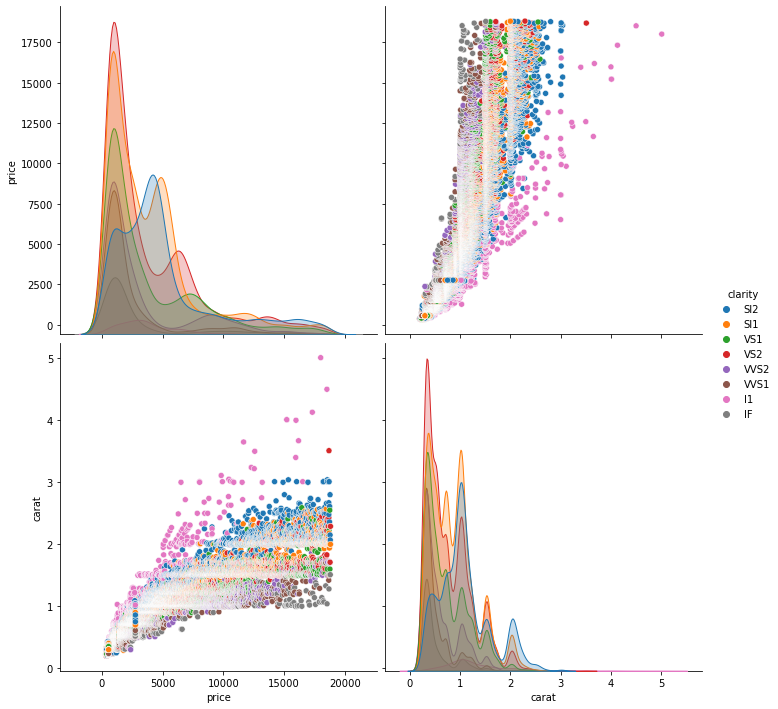

In [26]:
sns.pairplot(diamond_df[["price","carat","clarity"]],hue="clarity", height=5)

#### Plotting a bar plot for the feature clarity vs price of the diamond

Text(0.5, 1.0, 'Clarity Vs Price')

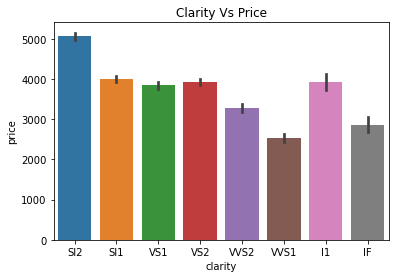

In [27]:
sns.barplot(x="clarity",y="price",data = diamond_df)
plt.title("Clarity Vs Price")

#### Plotting a bar plot for the feature clarity vs carat of the diamond

Text(0.5, 1.0, 'Clarity Vs Carat')

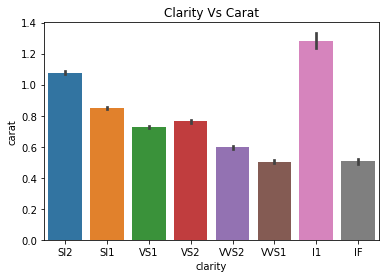

In [28]:
sns.barplot(x="clarity",y="carat",data = diamond_df)
plt.title("Clarity Vs Carat")

* SI2 clarity is most expensive compared to others.
* WS1 clarity is least expensive compared to others.
* L1 clarity is heaviest.

#### Plotting violin plots to understand the relation between cut, color and clarity with prices

Text(0.5, 1.0, 'Color vs Price ')

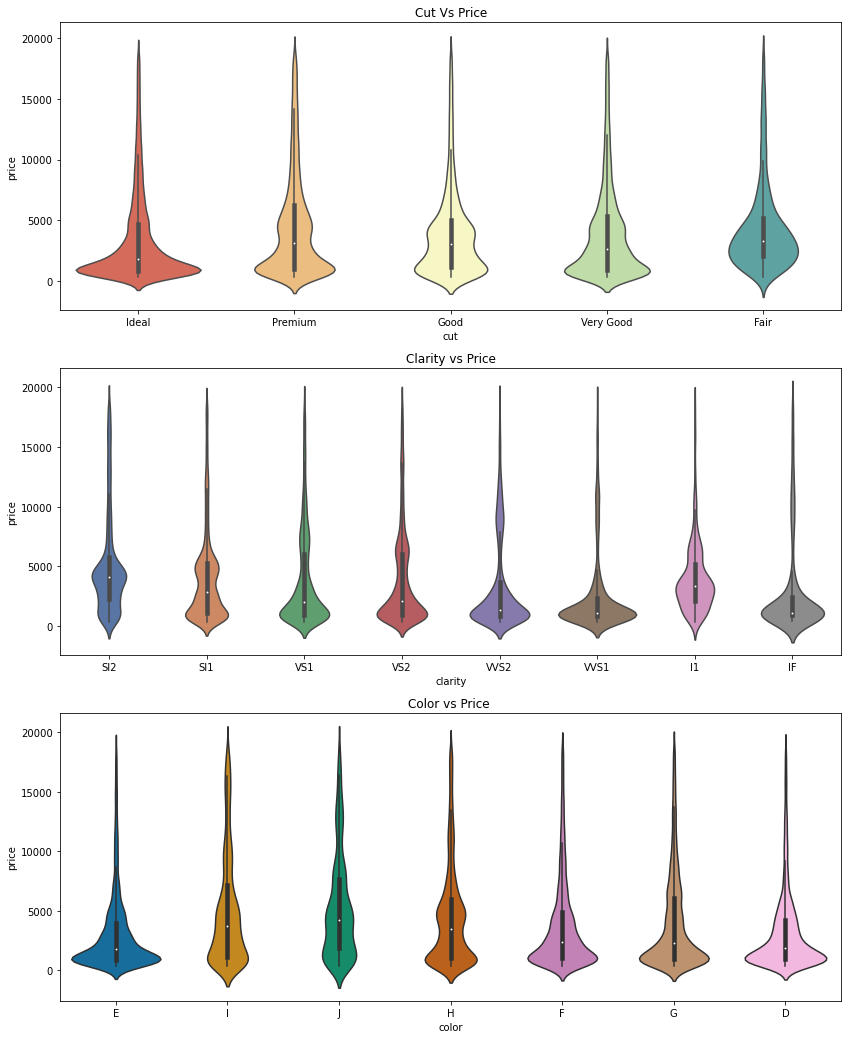

In [29]:
fig,ax = plt.subplots(3, figsize= (14,18))
sns.violinplot(x='cut',y='price',data=diamond_df, ax=ax[0],palette="Spectral")
sns.violinplot(x='clarity',y='price',data=diamond_df, ax=ax[1], palette="deep")
sns.violinplot(x='color',y='price',data = diamond_df, ax=ax[2],palette="colorblind")
ax[0].set_title("Cut Vs Price")
ax[1].set_title("Clarity vs Price")
ax[2].set_title("Color vs Price ")

* Premium cut diamonds are the most expensive diamonds.
* SI2 clarity is most expensive compared to others.
* J color diamonds are the most expensive.

#### Correlation matrix

In [30]:
corr = diamond_df.corr()

Text(0.5, 1.0, 'Correlation Plot to check Relation between features')

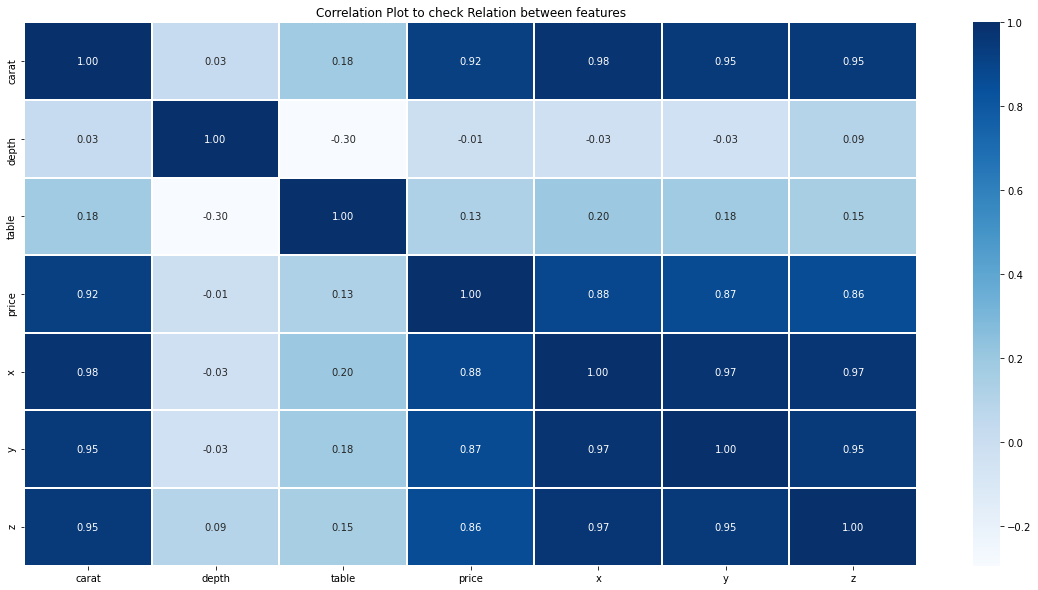

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap='Blues',annot=True,linewidths=1,fmt='0.2f')
plt.title("Correlation Plot to check Relation between features")

* Price of the diamond and carat weight of the diamond are highly correlated to each other.
* Depth and Table are less correlated with the price of the diamond.
* x,y and z are correlated with the price.
* Carat is one of the main feature to predict the price of a diamond.

#### Encoding categorical attributes

In [32]:
diamond_df.select_dtypes('object').columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [33]:
diamond_cat = ['cut','color','clarity']

In [34]:
diamond_df = pd.get_dummies(diamond_df,columns=diamond_cat,drop_first=True)

In [35]:
diamond_df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327.0,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335.0,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### Check for outliers

### Carat

In [36]:
# Quartiles
Q1=diamond_df['carat'].quantile(q=0.25)
Q3=diamond_df['carat'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(diamond_df['carat']))

1st Quartile (Q1) is:  0.4
3rd Quartile (Q3) is:  1.04
Interquartile range (IQR) is  0.64


In [37]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in carat: ', Lower_outliers)
print('Upper outliers in carat: ', Upper_outliers)

Lower outliers in carat:  -0.5599999999999999
Upper outliers in carat:  2.0


In [38]:
# identify outliers
outliers = [x for x in diamond_df['carat'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 1889


Text(0.5, 1.0, 'Distribution of carat')

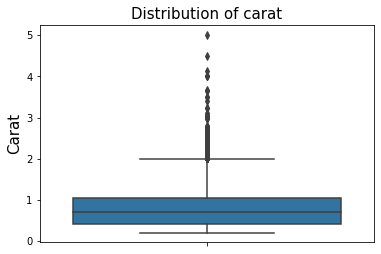

In [39]:
#boxplot
sns.boxplot(y='carat',data=diamond_df)
plt.ylabel('Carat', fontsize=15)
plt.title('Distribution of carat', fontsize=15)

### Depth

In [40]:
# Quartiles
Q1 = diamond_df['depth'].quantile(q=0.25)
Q3 = diamond_df['depth'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(diamond_df['depth']))

1st Quartile (Q1) is:  61.0
3rd Quartile (Q3) is:  62.5
Interquartile range (IQR) is  1.5


In [41]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in depth: ', Lower_outliers)
print('Upper outliers in depth: ', Upper_outliers)

Lower outliers in depth:  58.75
Upper outliers in depth:  64.75


In [42]:
# identify outliers
outliers = [x for x in diamond_df['depth'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 2545


Text(0.5, 1.0, 'Distribution of depth')

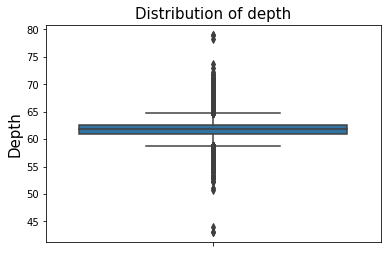

In [43]:
#boxplot
sns.boxplot(y='depth',data=diamond_df)
plt.ylabel('Depth', fontsize=15)
plt.title('Distribution of depth', fontsize=15)

### Table

In [44]:
# Quartiles
Q1=diamond_df['table'].quantile(q=0.25)
Q3=diamond_df['table'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(diamond_df['table']))

1st Quartile (Q1) is:  56.0
3rd Quartile (Q3) is:  59.0
Interquartile range (IQR) is  3.0


In [45]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in depth: ', Lower_outliers)
print('Upper outliers in depth: ', Upper_outliers)

Lower outliers in depth:  51.5
Upper outliers in depth:  63.5


In [46]:
# identify outliers
outliers = [x for x in diamond_df['depth'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 3750


Text(0.5, 1.0, 'Distribution of table')

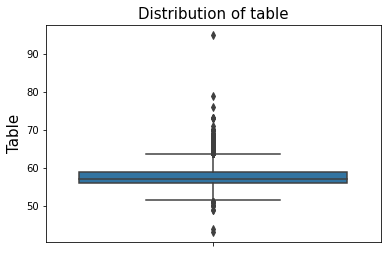

In [47]:
#boxplot
sns.boxplot(y='table',data=diamond_df)
plt.ylabel('Table', fontsize=15)
plt.title('Distribution of table', fontsize=15)

### X

In [48]:
# Quartiles
Q1=diamond_df['x'].quantile(q=0.25)
Q3=diamond_df['x'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(diamond_df['x']))

1st Quartile (Q1) is:  4.71
3rd Quartile (Q3) is:  6.54
Interquartile range (IQR) is  1.83


In [49]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in x: ', Lower_outliers)
print('Upper outliers in x: ', Upper_outliers)

Lower outliers in x:  1.9649999999999999
Upper outliers in x:  9.285


In [50]:
# identify outliers
outliers = [x for x in diamond_df['x'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers in slag: %d' % len(outliers))

Identified outliers in slag: 32


Text(0.5, 1.0, 'Distribution of x')

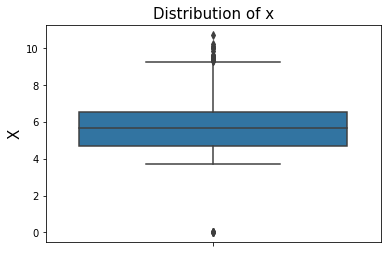

In [51]:
#boxplot
sns.boxplot(y='x',data=diamond_df)
plt.ylabel('X', fontsize=15)
plt.title('Distribution of x', fontsize=15)

### Y

In [52]:
# Quartiles
Q1=diamond_df['y'].quantile(q=0.25)
Q3=diamond_df['y'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(diamond_df['y']))

1st Quartile (Q1) is:  4.72
3rd Quartile (Q3) is:  6.54
Interquartile range (IQR) is  1.8200000000000003


In [53]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in y: ', Lower_outliers)
print('Upper outliers in y: ', Upper_outliers)

Lower outliers in y:  1.9899999999999993
Upper outliers in y:  9.27


In [54]:
# identify outliers
outliers = [x for x in diamond_df['y'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers in slag: %d' % len(outliers))

Identified outliers in slag: 29


Text(0.5, 1.0, 'Distribution of y')

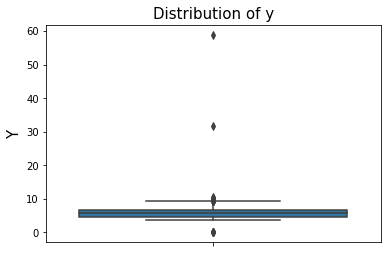

In [55]:
#boxplot
sns.boxplot(y='y',data=diamond_df)
plt.ylabel('Y', fontsize=15)
plt.title('Distribution of y', fontsize=15)

### Z

In [56]:
# Quartiles
Q1=diamond_df['z'].quantile(q=0.25)
Q3=diamond_df['z'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(diamond_df['z']))

1st Quartile (Q1) is:  2.91
3rd Quartile (Q3) is:  4.04
Interquartile range (IQR) is  1.13


In [57]:
# Outlier detection from Interquartile range (IQR) in original data
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in y: ', Lower_outliers)
print('Upper outliers in y: ', Upper_outliers)

Lower outliers in y:  1.2150000000000003
Upper outliers in y:  5.734999999999999


In [58]:
# identify outliers
outliers = [x for x in diamond_df['z'] if x < Lower_outliers or x > Upper_outliers]
print('Identified outliers in slag: %d' % len(outliers))

Identified outliers in slag: 49


Text(0.5, 1.0, 'Distribution of z')

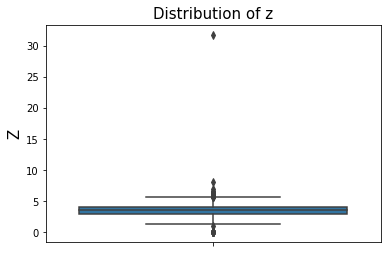

In [59]:
#boxplot
sns.boxplot(y='z',data=diamond_df)
plt.ylabel('Z', fontsize=15)
plt.title('Distribution of z', fontsize=15)

#### Treating the outliers

In [60]:
num_cols = ["carat", 'depth', 'table','x', 'y', 'z']

In [61]:
def outlier_remove(diamond_df,col):
    q1 = diamond_df[col].quantile(0.25)
    q3 = diamond_df[col].quantile(0.75)
    iqr = q3 - q1
    l_bound = q1 - 1.5 * iqr
    u_bound = q3 + 1.5 * iqr
    print('Column Name',col)
    print('Lower Bound is :',l_bound)
    print('Upper Bound is :',u_bound)
    
# Replacing the outliers with each bounds
    diamond_df[col]=diamond_df[col].apply(lambda x:l_bound if x<l_bound else(u_bound if x>u_bound else x))
    outliers = [val for val in diamond_df[col] if val < l_bound or val > u_bound]
    
    print('Length of Outliers :',len(outliers))
    
    print("percentage:",len(outliers)/len(diamond_df[col])*100)
    
    return '**'

In [62]:
for col in num_cols:
    print(outlier_remove(diamond_df,col))

Column Name carat
Lower Bound is : -0.5599999999999999
Upper Bound is : 2.0
Length of Outliers : 0
percentage: 0.0
**
Column Name depth
Lower Bound is : 58.75
Upper Bound is : 64.75
Length of Outliers : 0
percentage: 0.0
**
Column Name table
Lower Bound is : 51.5
Upper Bound is : 63.5
Length of Outliers : 0
percentage: 0.0
**
Column Name x
Lower Bound is : 1.9649999999999999
Upper Bound is : 9.285
Length of Outliers : 0
percentage: 0.0
**
Column Name y
Lower Bound is : 1.9899999999999993
Upper Bound is : 9.27
Length of Outliers : 0
percentage: 0.0
**
Column Name z
Lower Bound is : 1.2150000000000003
Upper Bound is : 5.734999999999999
Length of Outliers : 0
percentage: 0.0
**


<AxesSubplot:>

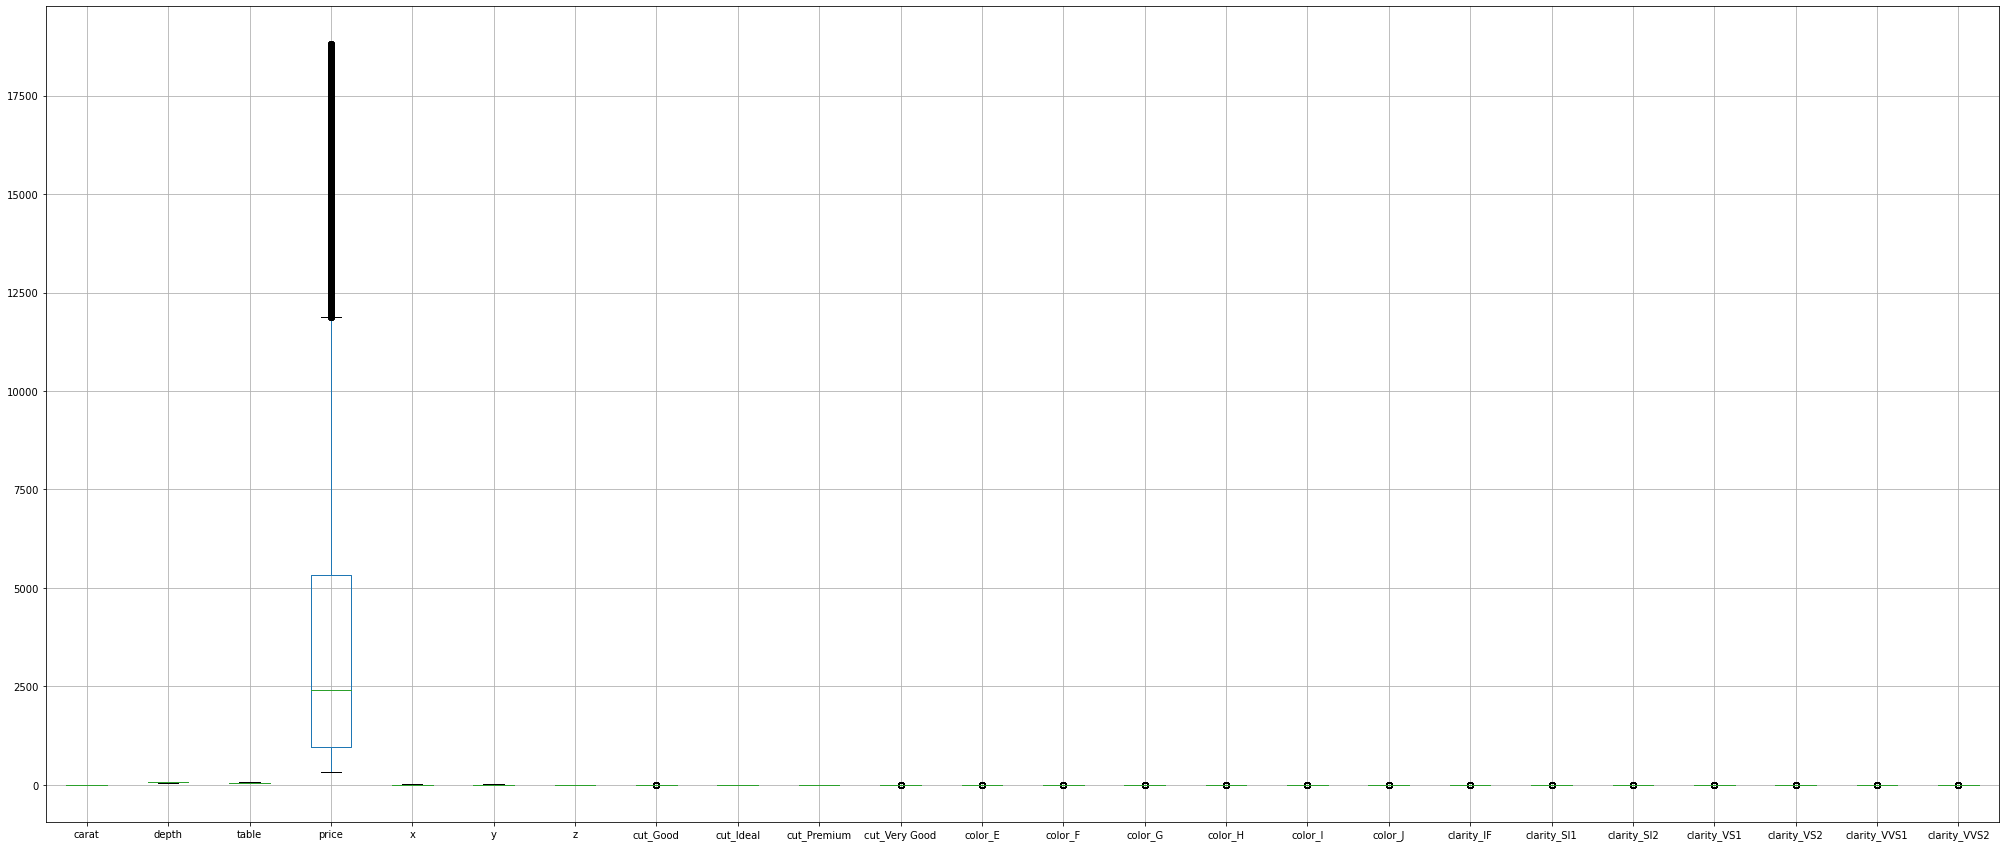

In [63]:
# again check for outliers in dataset using boxplot
diamond_df.boxplot(figsize=(35,15))

### 3.Seperate features and Labels

#### Splitting the data into independent and dependent attributes

In [64]:
#independent and dependent variables
X = diamond_df.drop(['price'],axis=1) # contains all the independent variables
y = diamond_df['price']  # dependent variable

In [65]:
print(X.shape)
print(y.shape)

(53940, 23)
(53940,)


#### 4.Do normalisation if required 

In [66]:
# Standardizing the data 
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.fit_transform(X)

#### 5.Split the dataset to train and test

In [67]:
# Split X and y into training and test set in 75:25 ratio
X_train,X_test,y_train,y_test = train_test_split(X_train,y,test_size=0.25,random_state=2)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40455, 23)
(13485, 23)
(40455,)
(13485,)


#### Implementation of KNN Algorithm from scratch

In [69]:
#Creating a function to use in the algorithm to help with sorting
def secondelem(elem):
    return elem[1]

In [70]:
def KNNClassify(X_test, Y_train = y_train,X_train = X_train, k = 8):
   
    min_dist = []
    Y_train = Y_train.to_numpy()
    # in the training set, calculate eucledien distance against the test example
    for i,point in enumerate(X_train):
        d1 = (point[0]-X_test[0])**2
        d2 = (point[1]-X_test[1])**2
        d3 = (point[2]-X_test[2])**2
        d4 = (point[3]-X_test[3])**2
        dist = np.sqrt(d1+d2+d3+d4)
        #append the calculated distance in a list
        min_dist.append((i,dist))
        
    #sort distances in ascending order    
    min_dist.sort(key = secondelem)
    
    #get top k nearest neighbours
    neighbours = min_dist[:k]
    
    #get index of the minimum distances
    idx = []
    for tup in neighbours:
        idx.append(tup[0])
        
    #check which label has majority
    output = Y_train[idx]
    values, counts = np.unique(output, return_counts=True)
    #return label with majority occurence
    max_idx = np.argmax(counts)
    return values[max_idx]

In [71]:
predictions = list(map(KNNClassify, X_test))

In [72]:
def accuracy(pred , y_test):
    count = 0
    for i in range(len(pred)):
        if pred[i] == y_test.iloc[i]:
            count +=1            
    return print("The KNeighbors Regressor model from scratch accuracy =",(count/len(pred))*100)

In [73]:
accuracy(predictions, y_test)

The KNeighbors Regressor model from scratch accuracy = 0.7193177604746014


### Train a model using sklearn KNN Algorithm

### KNN Regressor

In [74]:
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor

In [75]:
knn_model = KNeighborsRegressor(n_neighbors=8)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [76]:
y_pred_knn = knn_model.predict(X_test)
# performance on train data
print('Performance on training data using KNeighbors Regressor is {}'.format(knn_model.score(X_train,y_train)))
# performance on test data
knn_model_score = knn_model.score(X_test, y_test)
print("The KNeighbors Regressor model accuracy is {}".format(knn_model_score))

Performance on training data using KNeighbors Regressor is 0.9632041572309874
The KNeighbors Regressor model accuracy is 0.9511749366305277


Model				 RMSE 		 R2
KNeighborsRegressor 		 880.40 	0.95


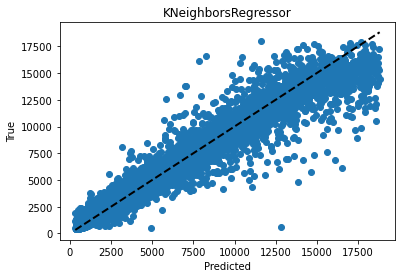

In [77]:
print("Model\t\t\t\t RMSE \t\t R2")
print("""KNeighborsRegressor \t\t {:.2f} \t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_knn)),
            r2_score(y_test, y_pred_knn)))

plt.scatter(y_test, y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNeighborsRegressor")
plt.show()

Observations:
* The KNeighbors Regressor model accuracy from scratch implementation is 72% and the KNeighbors Regressor model accuracy using sklearn is 95%.